In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda : 0' if torch.cuda.is_available() else 'cpu')

# dataset
train_dataset = torchvision.datasets.FashionMNIST('data', download= True, transform= transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST('data', download= True, transform= transforms.Compose([transforms.ToTensor()]))

# loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= 100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size= 100)

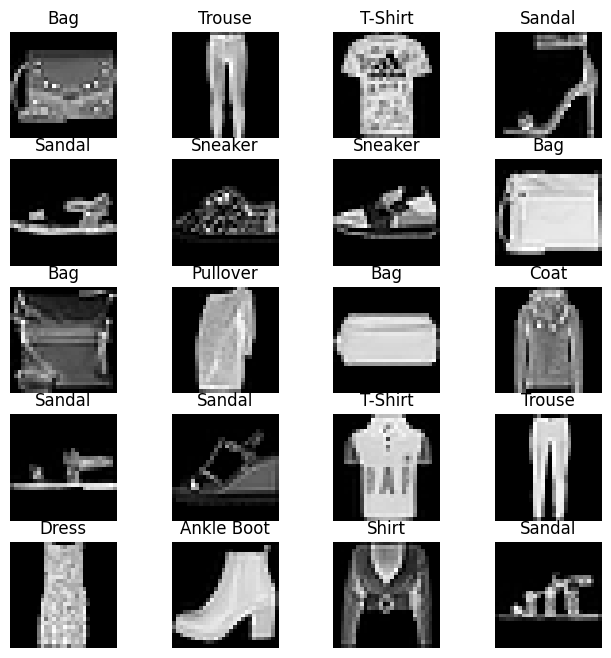

In [4]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouse', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize= (8, 8))
columns = 4
rows = 5

for i in range(1, columns*rows + 1):
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0, :, :]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap= 'gray')

plt.show()

In [ ]:
# 심층 신경망 생성
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features= 784, out_features= 256)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=256, out_features= 128)
        self.fc3 = nn.Linear(in_features= 128, out_features= 10)

    def forward(self, input_data):
        out = input_data.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        
        return out

In [ ]:
lr = 0.001
model = FashionDNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr= lr)
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
acc_list = []

pred_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        outputs = model(train)
        loss = criterion(outputs, labels)
        opt.zero_grad()
        loss.backward()
        opt.step()
        count += 1

        if not(count % 50):
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                pred_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)

            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            acc_list.append(accuracy)

        if not (count % 500):
            print('Iteration: {}, Loss: {}, Accuracy: {}%'.format(count, loss.data, accuracy) )


Iteration: 500, Loss: 0.619032621383667, Accuracy: 84.75833129882812%
Iteration: 1000, Loss: 0.4434753656387329, Accuracy: 86.04666900634766%
Iteration: 1500, Loss: 0.356201708316803, Accuracy: 85.875%
Iteration: 2000, Loss: 0.37042149901390076, Accuracy: 87.06999969482422%
Iteration: 2500, Loss: 0.2799746096134186, Accuracy: 87.24166870117188%
Iteration: 3000, Loss: 0.29353392124176025, Accuracy: 88.13166809082031%
